In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm 
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import itertools
import math
from pylab import rcParams

# 그래프 사이즈 지정
rcParams['figure.figsize'] = 15,10

In [2]:
df = pd.read_csv('./SPY_2011_22.csv')
df['Date'] = pd.to_datetime(df['Date'])  # datetime으로 변환
df1 = df.set_index('Date')  # Date를 인덱스로 지정
df_y = pd.DataFrame(df1['Close'].resample('BMS').first())  # y: 달의 첫날(BMS)의 종가로 지정
df1 = df1.reset_index()  # 다시 컬럼으로 변환
df_y = df_y.reset_index()
df_y = df_y.iloc[1:, :]  # 11년 1월을 예측할 데이터가 존재하지 않기 때문에 제외

In [3]:
df1 = df.set_index('Date')
df_y1 = df1['Close'].resample('1m').mean()  # 월 평균

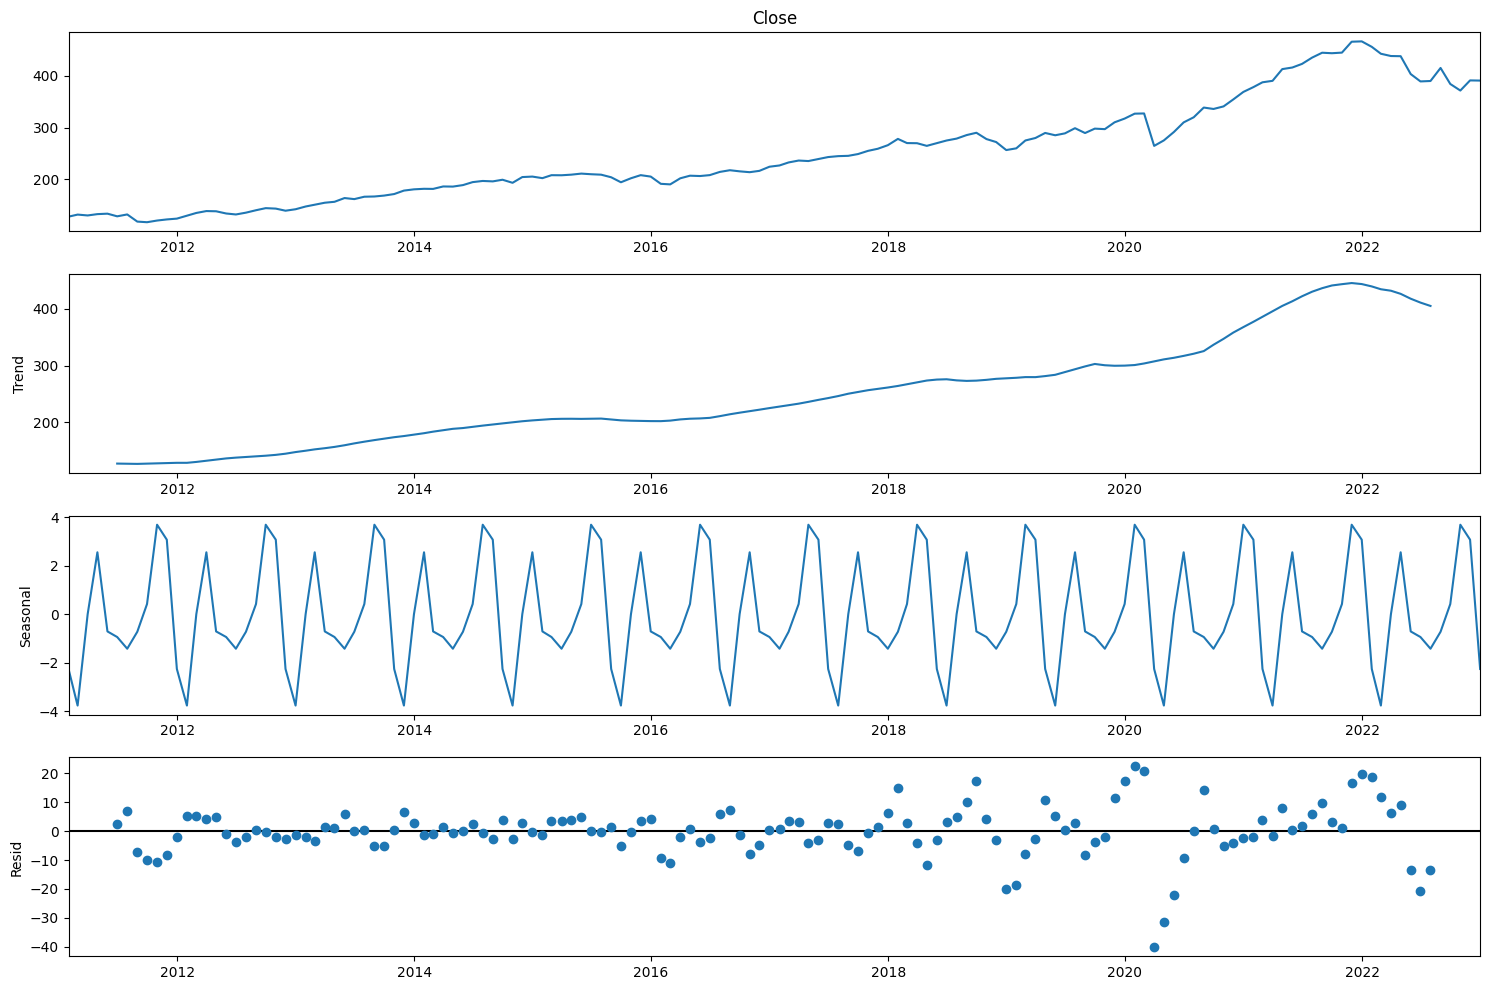

In [4]:
decomposition= sm.tsa.seasonal_decompose(df_y1, period = 11, model='additive')
fig = decomposition.plot()
plt.show()

In [5]:
# ARIMA 모델의 인자(3개) 지정
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [6]:
param_list = []
param_seasonal_list = []
results_AIC_list = []

In [7]:
for param in pdq:
     for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_y1,order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            param_list.append(param)
            param_seasonal_list.append(param_seasonal)
            results_AIC_list.append(results.aic)
        except:
             continue

C:\Users\user\anaconda3\envs\py3_8_13\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\envs\py3_8_13\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\envs\py3_8_13\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\envs\py3_8_13\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\envs\py3_8_13\lib\site-p

C:\Users\user\anaconda3\envs\py3_8_13\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\envs\py3_8_13\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\envs\py3_8_13\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\envs\py3_8_13\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\anaconda3\envs\py3_8_13\lib\site-p

In [8]:
ARIMA_list = pd.DataFrame({'Parameter':param_list,'Seasonal':param_seasonal_list, 'AIC':results_AIC_list})
ARIMA_list.sort_values(by='AIC')

,Parameter,Seasonal,AIC
224,"(0, 2, 2)","(0, 2, 2, 12)",750.060454
710,"(2, 2, 2)","(0, 2, 2, 12)",750.908554
467,"(1, 2, 2)","(0, 2, 2, 12)",750.976968
143,"(0, 1, 2)","(0, 2, 2, 12)",751.443186
629,"(2, 1, 2)","(0, 2, 2, 12)",751.969860
...,...,...,...
28,"(0, 0, 1)","(0, 0, 1, 12)",1528.820802
54,"(0, 0, 2)","(0, 0, 0, 12)",1668.671584
1,"(0, 0, 0)","(0, 0, 1, 12)",1711.021146
27,"(0, 0, 1)","(0, 0, 0, 12)",1807.564352


In [9]:
mod = sm.tsa.statespace.SARIMAX(df_y1,
                                 order=(2, 1, 2),
                                 seasonal_order=(1, 2, 2, 12),
                                 enforce_stationarity=False,
                                 enforce_invertibility=False)
results = mod.fit()
print(results.summary())

C:\Users\user\anaconda3\envs\py3_8_13\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  144
Model:             SARIMAX(2, 1, 2)x(1, 2, 2, 12)   Log Likelihood                -369.452
Date:                            Sun, 12 Mar 2023   AIC                            754.904
Time:                                    15:00:16   BIC                            775.078
Sample:                                01-31-2011   HQIC                           763.046
                                     - 12-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1904      0.169     -1.125      0.261      -0.522       0.141
ar.L2         -0.8713      0.114   

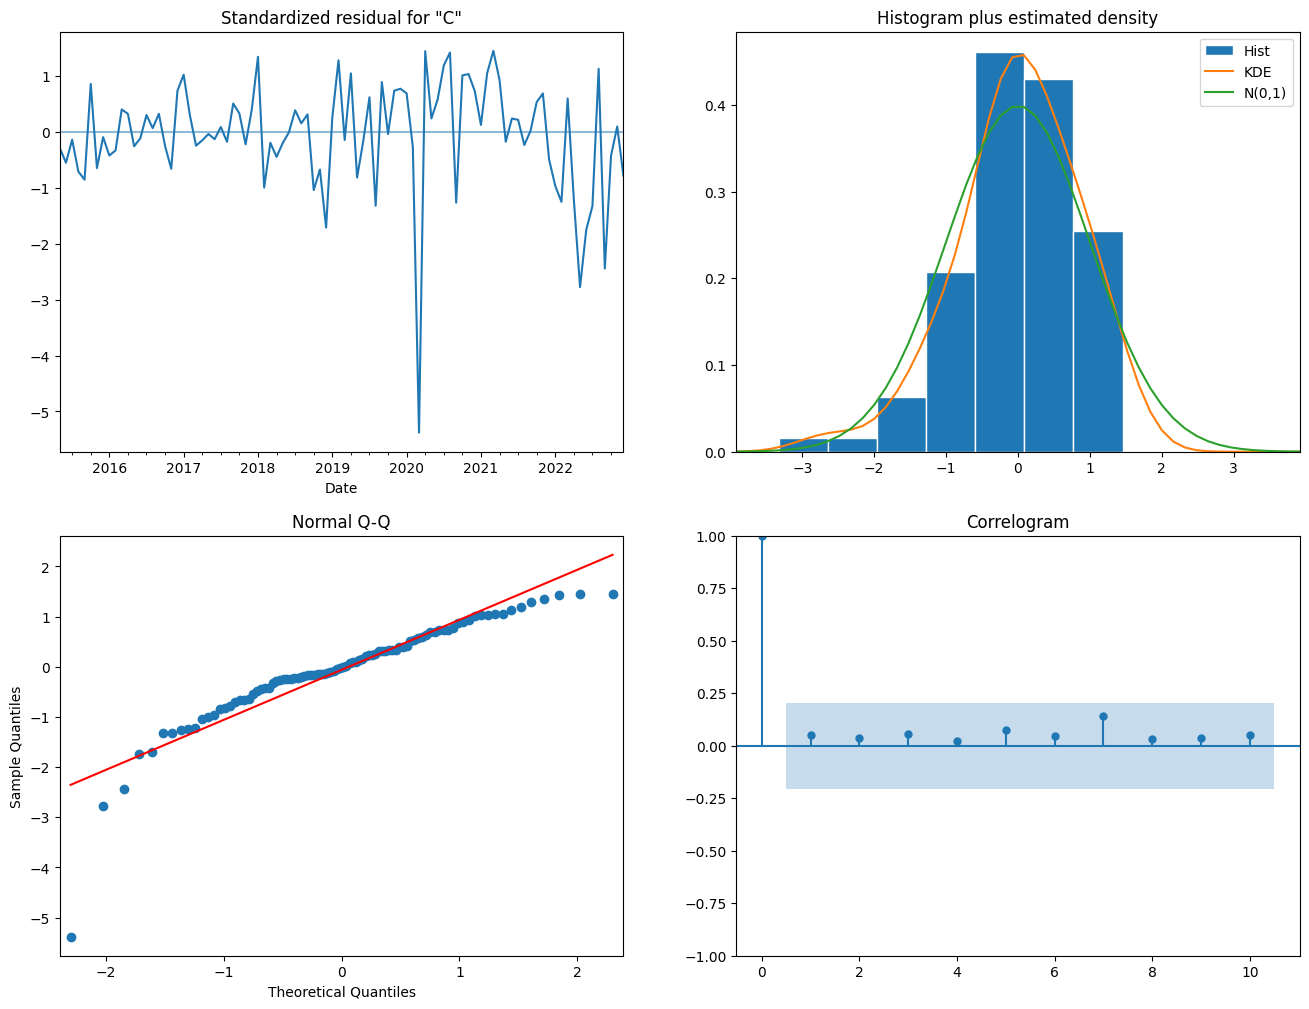

In [10]:
results.plot_diagnostics(figsize=(16, 12))
plt.show()

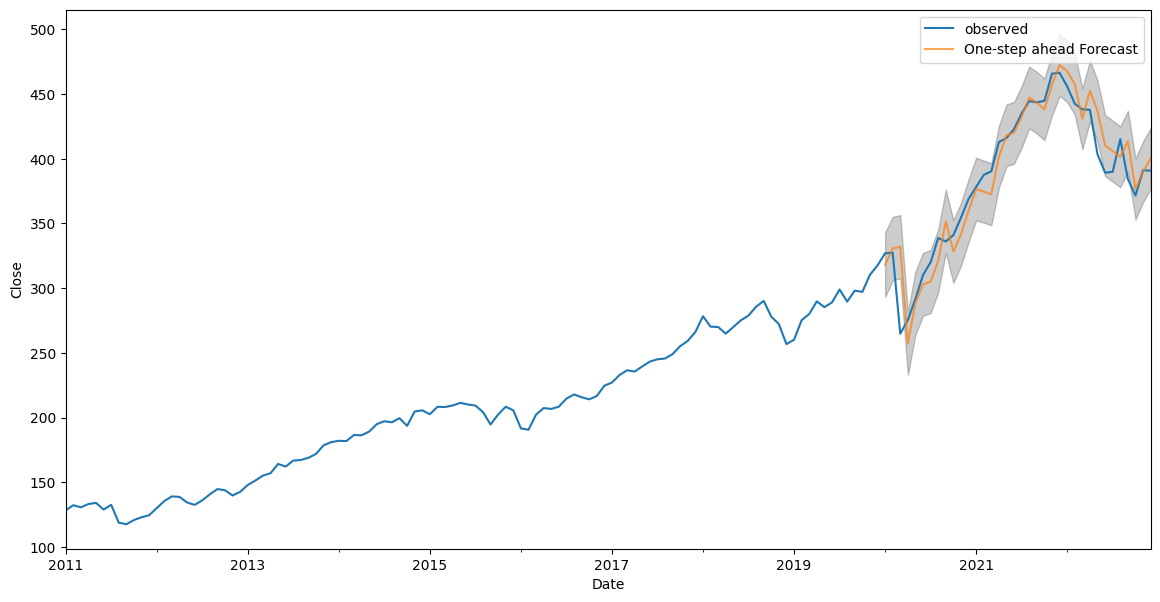

In [11]:
# 갖고 있는 데이터로 2020-01-31부터 2022-12-31까지 예측한 결과와 실제값 동시에 시각화
pred = results.get_prediction(start=pd.to_datetime('2020-01-31'), dynamic=False)
pred_ci = pred.conf_int() #추정된 계수의 신뢰구간 계산

ax = df_y1.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,pred_ci.iloc[:, 0],pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.legend()
plt.show()

In [12]:
y_forecasted = pred.predicted_mean
y_truth = df_y1['2020-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

# MSE가 낮을 수록 좋음 (예측값과 실제값의 차이가 적다)

MSE 293.71


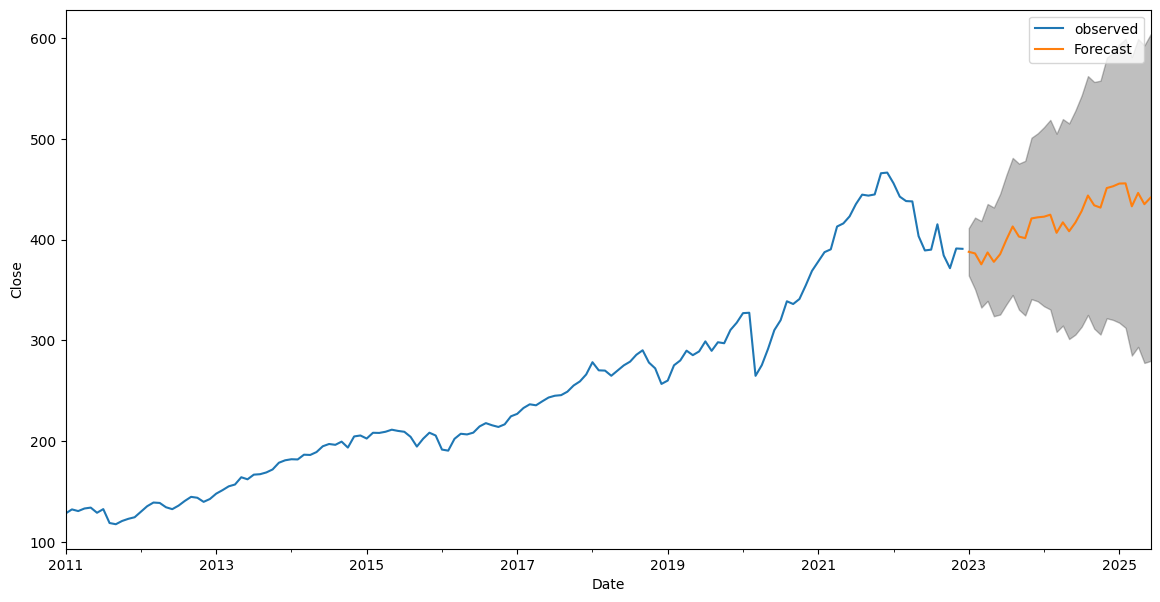

In [13]:
# 갖고 있는 데이터로 미래 예측
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int() #추정된 계수의 신뢰구간 계산
ax = df_y1.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                 pred_ci.iloc[:, 0],
                 pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.legend()
plt.show()